Parametry początkowe: 
Temperatura:    1000.0 K Ciśnienie:  101325.0 Pa
Objętość:       1.0 m^3
     t [s]      T [K]    V [m^3]     P [Pa]       u [J/kg]
 1.000e-05 1000.000002634      1.000 101325.000   1.086203e+06
 2.000e-05 1000.000002793      1.000 101325.000   1.086203e+06
 3.000e-05 1000.000003081      1.000 101325.000   1.086203e+06
 4.000e-05 1000.000003498      1.000 101325.000   1.086203e+06
 5.000e-05 1000.000004044      1.000 101325.000   1.086203e+06
 6.000e-05 1000.000004720      1.000 101325.000   1.086203e+06
 7.000e-05 1000.000005526      1.000 101325.001   1.086203e+06
 8.000e-05 1000.000006462      1.000 101325.001   1.086203e+06
 9.000e-05 1000.000007528      1.000 101325.001   1.086203e+06
 1.000e-04 1000.000008725      1.000 101325.001   1.086203e+06
 1.100e-04 1000.000010053      1.000 101325.001   1.086203e+06
 1.200e-04 1000.000011512      1.000 101325.001   1.086203e+06
 1.300e-04 1000.000013102      1.000 101325.001   1.086203e+06
 1.400e-04 1000.000014824 

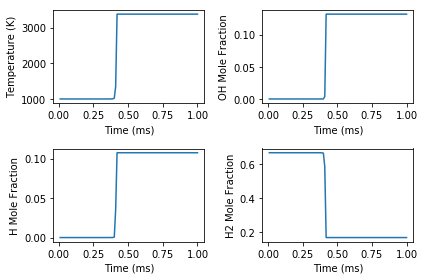

In [60]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct


gas = ct.Solution('gri30.xml')
gas.TPX = 1000, ct.one_atm, 'H2:2,O2:1'
r = ct.Reactor(gas)
print('Parametry początkowe: \nTemperatura:%10.1f K Ciśnienie:%10.1f Pa\nObjętość:%10.1f m^3' % (gas.T, gas.P, r.volume))
sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra = ['t'])

print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t = time *1e3)       
    if (states[n].T - states[n-1].T) > 1000:
        t_zap = states[n-1].T
    print('%10.3e %10.9f %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                            r.thermo.P, r.thermo.u))
    if (n > 0):
        if(states[n].T - states[n-1].T) == 0:
            print("nie zaszlo spalanie")
            break
            
print('Temperatura zapłonu  : %10.3f K' % (t_zap))
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()
